In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main import trajectory, plot

1. Parabola

In [2]:
a = 2
t = np.linspace(-1,1,100)
x = a*t**2
y = 2*a*t


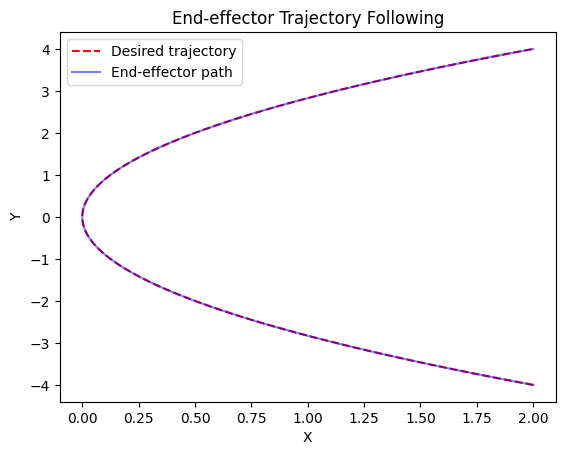

In [3]:
ee_traj = trajectory(x,y)
plot(x,y,ee_traj)

2. Waveform

In [4]:
t = np.linspace(-10,10,100)
x = 3 * np.cos(t)**3
x = 2 * np.sin(t)**3

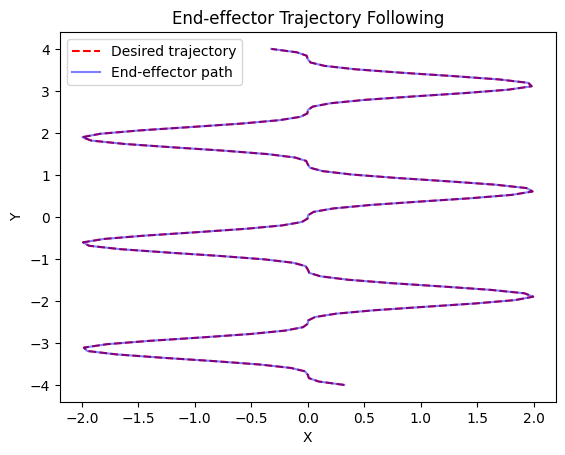

In [5]:
ee_traj = trajectory(x,y)
plot(x,y,ee_traj)

3. Circle

In [6]:
t = np.linspace(-10,10,100)
x = np.cos(t)
y = np.sin(t)

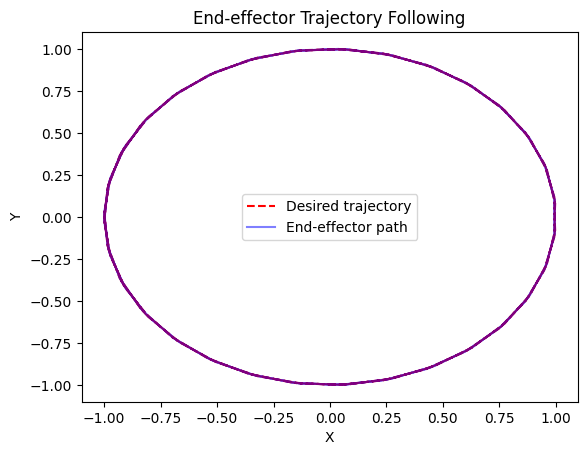

In [7]:
ee_traj = trajectory(x,y)
plot(x,y,ee_traj)